In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the historic data
historic_data = 'historic.csv'
historic_df = pd.read_csv(historic_data)

In [3]:
# Display the first few rows of the dataset
historic_df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


The dataset has the following columns:

* item_no: Internal identifier for a past product or a product candidate for the future.
* category: Category of the product.
* main_promotion: Main promotion that was used to promote the product.
* color: The main color of the product.
* stars: Stars of reviews from a comparable product of a competitor (from 0 = very negative reviews to 5 = very positive reviews).
* success_indicator: Indicator whether a product was successful (top) or not (flop) in the past.

In [4]:
# Check for missing values
missing_values = historic_df.isnull().sum()
missing_values

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

* There are no missing values in the dataset.

In [5]:
# Generate summary statistics for numerical columns
summary_stats = historic_df.describe()
summary_stats

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


**Summary Statistics for Numerical Column (stars):**

**The stars column has 8000 entries.**

* Mean: 3.47
* Standard Deviation: 0.98
* Minimum: 0.3
* Maximum: 6.1
* 25th Percentile: 2.8
* 50th Percentile (Median): 3.5
* 75th Percentile: 4.2

In [6]:
# Display the data type information
data_info = historic_df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [7]:
# Analyze the distribution of categorical columns
category_distribution = historic_df['category'].value_counts()
category_distribution

category
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: count, dtype: int64

In [8]:
promotion_distribution = historic_df['main_promotion'].value_counts()
promotion_distribution

main_promotion
Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: count, dtype: int64

In [9]:
color_distribution = historic_df['color'].value_counts()
color_distribution

color
Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: count, dtype: int64

In [10]:
success_distribution = historic_df['success_indicator'].value_counts()
success_distribution

success_indicator
top     5185
flop    2815
Name: count, dtype: int64

In [11]:
# Define a color palette
palette = sns.color_palette("husl", len(historic_df['category'].unique()))

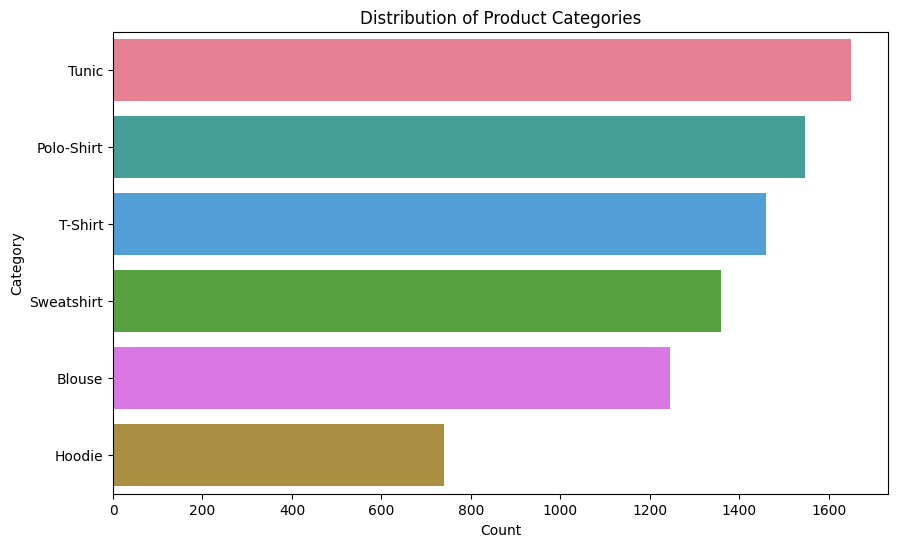

In [12]:
# Plotting category distribution
category_palette = sns.color_palette("husl", len(historic_df['category'].unique()))
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=historic_df, order=historic_df['category'].value_counts().index, hue='category', palette=category_palette, dodge=False)
plt.title('Distribution of Product Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

**Product Categories:**

* The most common categories are Tunic, Polo-Shirt, and T-Shirt.
* The least common category is Hoodie.

In [13]:
# Define a color palette
palette = sns.color_palette("husl", len(historic_df['main_promotion'].unique()))

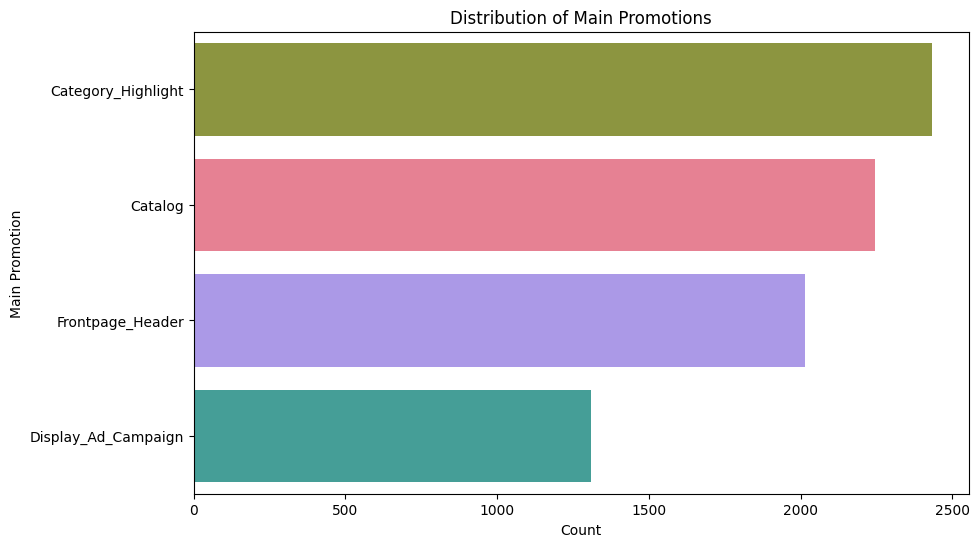

In [14]:
# Plotting main promotion distribution
promotion_palette = sns.color_palette("husl", len(historic_df['main_promotion'].unique()))
plt.figure(figsize=(10, 6))
sns.countplot(y='main_promotion', data=historic_df, order=historic_df['main_promotion'].value_counts().index, hue='main_promotion', palette=promotion_palette, dodge=False)
plt.title('Distribution of Main Promotions')
plt.xlabel('Count')
plt.ylabel('Main Promotion')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

**Main Promotions:**

* The most frequently used promotions are Category Highlight and Catalog.
* Display Ad Campaign is the least used promotion.

In [15]:
# Define a color palette
palette = sns.color_palette("husl", len(historic_df['color'].unique()))

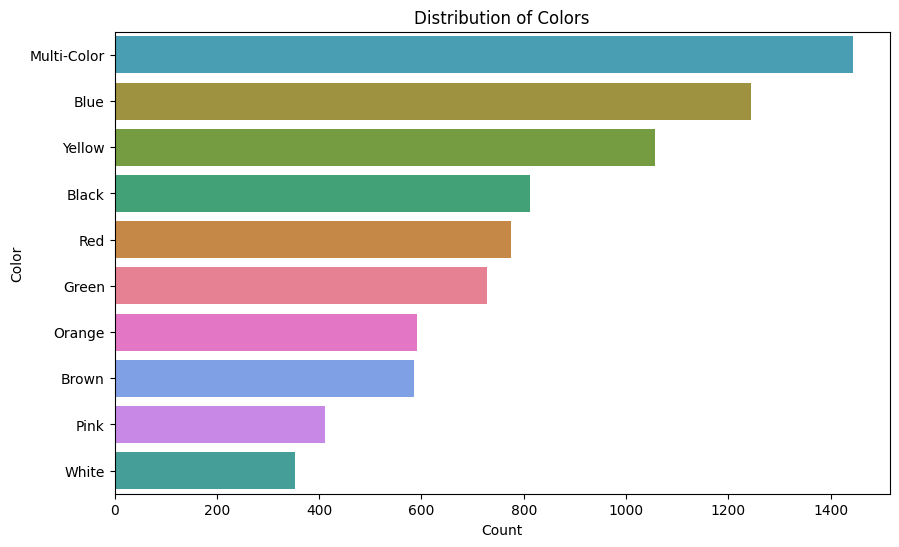

In [16]:
# Plotting color distribution
color_palette = sns.color_palette("husl", len(historic_df['color'].unique()))
plt.figure(figsize=(10, 6))
sns.countplot(y='color', data=historic_df, order=historic_df['color'].value_counts().index, hue='color', palette=color_palette, dodge=False)
plt.title('Distribution of Colors')
plt.xlabel('Count')
plt.ylabel('Color')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

**Colors:**

* The most common colors are Multi-Color, Blue, and Yellow.
* The least common colors are Pink and White.

In [17]:
# Define a color palette for success_indicator distribution
success_palette = sns.color_palette("husl", len(historic_df['success_indicator'].unique()))

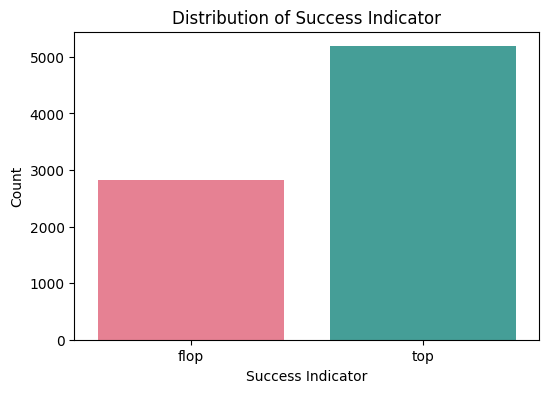

In [18]:
# Plotting success_indicator distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='success_indicator', data=historic_df, hue='success_indicator', palette=success_palette, dodge=False)
plt.title('Distribution of Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

**Success Indicator:**

* There are more successful products (top) than unsuccessful ones (flop).

In [19]:
# Define a color palette for success_indicator distribution
success_palette = sns.color_palette("husl", len(historic_df['success_indicator'].unique()))

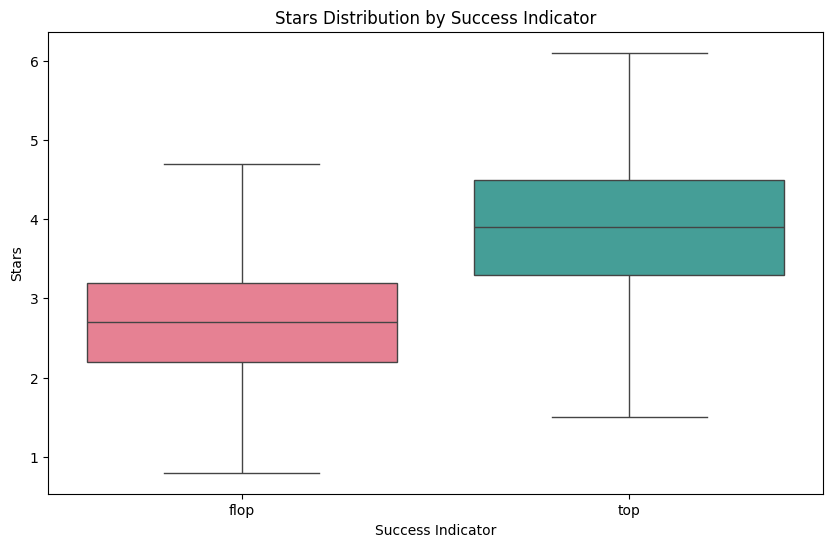

In [20]:
# Boxplot of stars by success_indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x='success_indicator', y='stars', data=historic_df, hue='success_indicator', palette=success_palette, showfliers=False)
plt.title('Stars Distribution by Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Stars')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

**Stars Distribution by Success Indicator:**

* Successful products (top) generally have higher star ratings.
* Unsuccessful products (flop) have a wider range of star ratings, with some very low values.

In [21]:
# Perform one-hot encoding for categorical columns
historic_df_encoded = pd.get_dummies(historic_df, columns=['category', 'main_promotion', 'color'])

In [22]:
# Encode the 'success_indicator' column
historic_df_encoded['success_indicator'] = historic_df_encoded['success_indicator'].apply(lambda x: 1 if x == 'top' else 0)

In [23]:
# Calculate the correlation matrix
correlation_matrix = historic_df_encoded.corr()

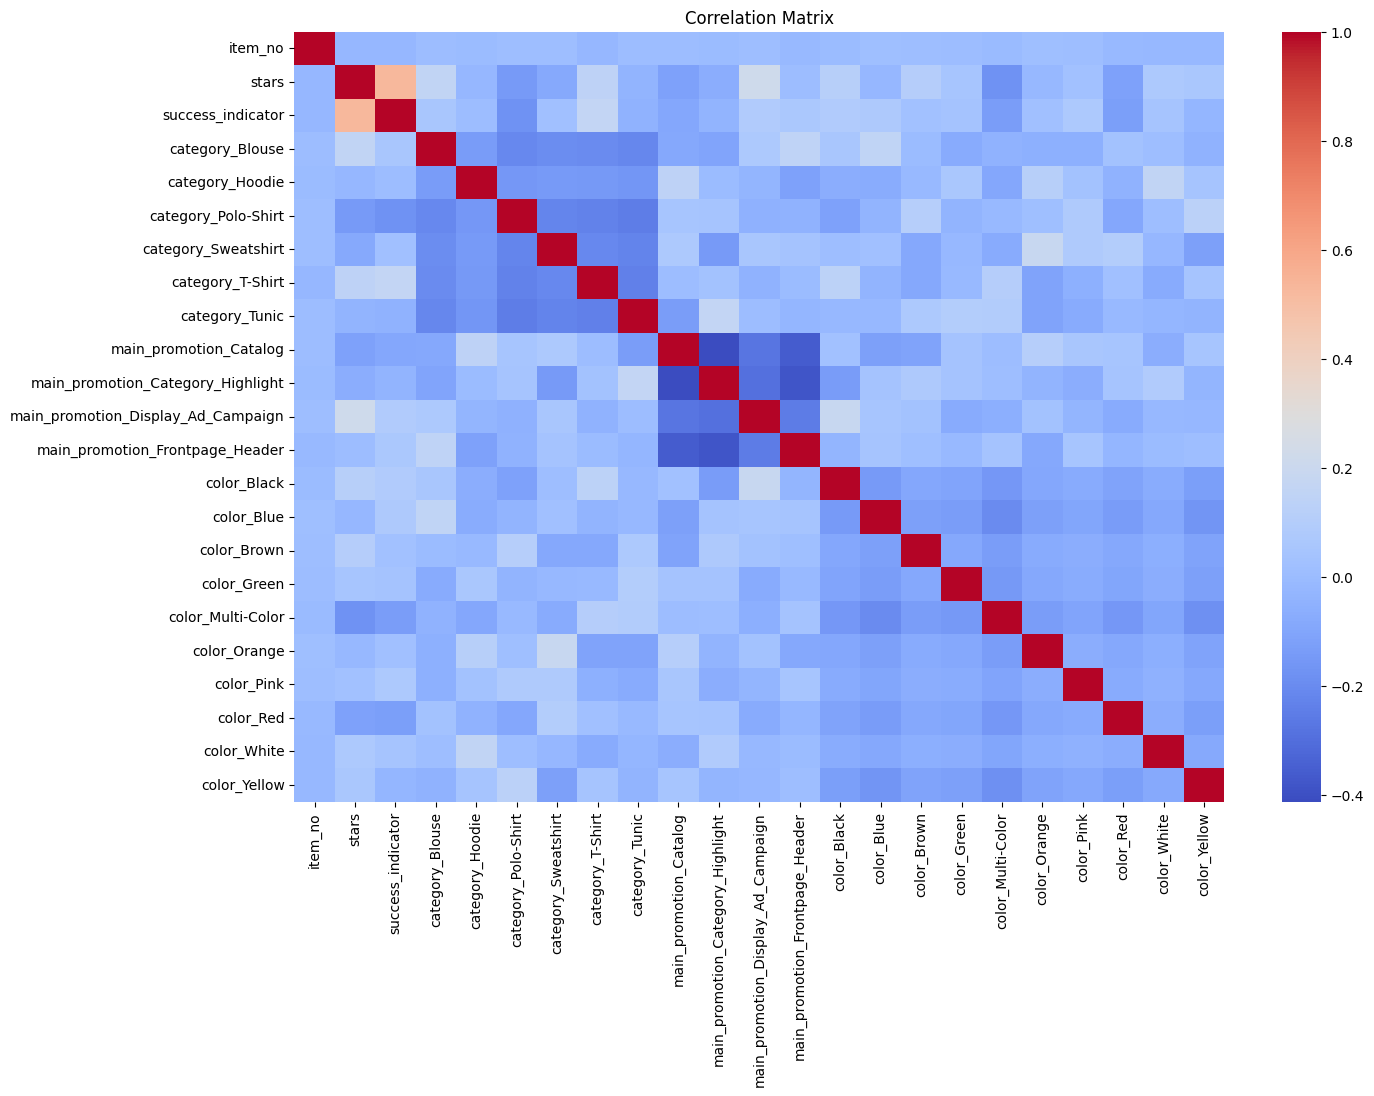

In [24]:
# Display the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Separate features and target
X = historic_df.drop(columns=['success_indicator', 'item_no'])
y = historic_df['success_indicator']

In [26]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [27]:
# Preprocessing pipeline for features
categorical_features = ['category', 'main_promotion', 'color']
numerical_features = ['stars']

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [30]:
# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [31]:
# Train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Evaluate the model
y_pred_rf = rf_model.predict(X_test_preprocessed)
print("RandomForestClassifier Report:\n", classification_report(y_test, y_pred_rf))
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))

RandomForestClassifier Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       571
           1       0.84      0.90      0.87      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.82      0.82      0.82      1600

RandomForestClassifier Accuracy: 0.82125


In [33]:
# Build the ANN model
def build_ann(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# Convert sparse matrices to dense arrays
X_train_dense = X_train_preprocessed.toarray()
X_test_dense = X_test_preprocessed.toarray()

In [35]:
# Train the ANN model
input_shape = X_train_dense.shape[1]
ann_model = build_ann(input_shape)
ann_model.fit(X_train_dense, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
160/160 [==============================] - 12s 8ms/step - loss: 0.5533 - accuracy: 0.7330 - val_loss: 0.4642 - val_accuracy: 0.8211
Epoch 2/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4822 - accuracy: 0.8018 - val_loss: 0.4505 - val_accuracy: 0.8297
Epoch 3/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4766 - accuracy: 0.8092 - val_loss: 0.4417 - val_accuracy: 0.8289
Epoch 4/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4696 - accuracy: 0.8146 - val_loss: 0.4387 - val_accuracy: 0.8328
Epoch 5/10
160/160 [==============================] - 1s 9ms/step - loss: 0.4594 - accuracy: 0.8189 - val_loss: 0.4350 - val_accuracy: 0.8328
Epoch 6/10
160/160 [==============================] - 1s 9ms/step - loss: 0.4571 - accuracy: 0.8244 - val_loss: 0.4297 - val_accuracy: 0.8383
Epoch 7/10
160/160 [==============================] - 2s 13ms/step - loss: 0.4577 - accuracy: 0.8229 - val_loss: 0.4283 - val_accuracy: 0.8375
Epoc

In [36]:
# Evaluate the ANN model
loss, accuracy = ann_model.evaluate(X_test_dense, y_test)
print("ANN Model Accuracy:", accuracy)

50/50 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.8406
ANN Model Accuracy: 0.840624988079071


In [37]:
# Predict using the ANN model
y_pred_ann = (ann_model.predict(X_test_dense) > 0.5).astype("int32")

50/50 [==============================] - 0s 5ms/step


In [38]:
# Generate classification report for the ANN model
print("ANN Model Report:\n", classification_report(y_test, y_pred_ann))

ANN Model Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.76       571
           1       0.84      0.92      0.88      1029

    accuracy                           0.84      1600
   macro avg       0.84      0.81      0.82      1600
weighted avg       0.84      0.84      0.84      1600



In [39]:
# RandomForestClassifier metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

In [40]:
# ANN metrics
ann_accuracy = accuracy
ann_report = classification_report(y_test, y_pred_ann)

In [41]:
# Print the comparison
print("RandomForestClassifier Report:\n", rf_report)
print("RandomForestClassifier Accuracy:", rf_accuracy)
print("\n")
print("ANN Model Report:\n", ann_report)
print("ANN Model Accuracy:", ann_accuracy)

RandomForestClassifier Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       571
           1       0.84      0.90      0.87      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.82      0.82      0.82      1600

RandomForestClassifier Accuracy: 0.82125


ANN Model Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.76       571
           1       0.84      0.92      0.88      1029

    accuracy                           0.84      1600
   macro avg       0.84      0.81      0.82      1600
weighted avg       0.84      0.84      0.84      1600

ANN Model Accuracy: 0.840624988079071


In [42]:
# Load the new prediction data
prediction_data = 'prediction_input.csv'
prediction_df = pd.read_csv(prediction_data)

In [43]:
# Display the first few rows of the dataset
historic_df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [44]:
# Preprocess the new data using the same pipeline
X_new = prediction_df.drop(columns=['item_no'])
X_new_preprocessed = preprocessor.transform(X_new)
X_new_dense = X_new_preprocessed.toarray()  # Convert to dense array if using ANN

In [45]:
# Use the ANN model to predict the success of the new products
predictions = (ann_model.predict(X_new_dense) > 0.5).astype("int32")

63/63 [==============================] - 0s 3ms/step


In [46]:
# Add predictions to the dataframe
prediction_df['success_prediction'] = predictions

In [47]:
# Save the predictions to a new CSV file
prediction_df.to_csv('prediction_output.csv', index=False)